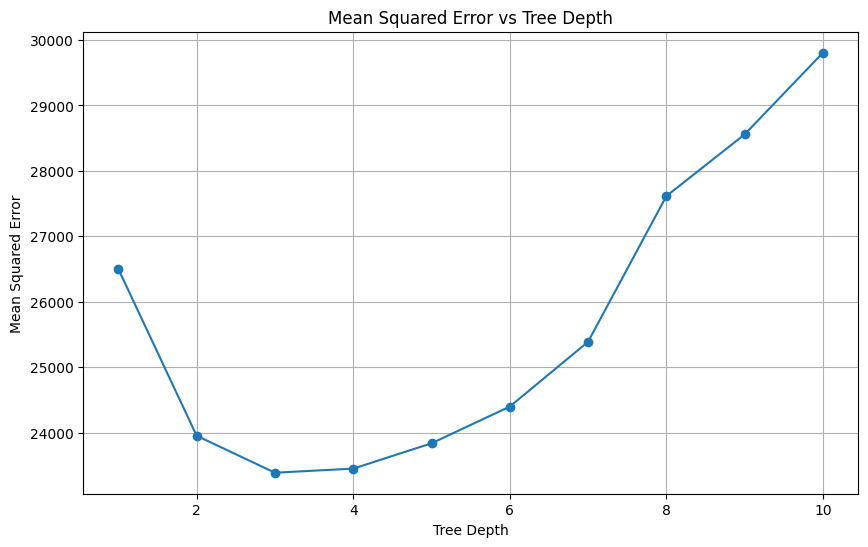

Best tree depth based on cross-validation: 3


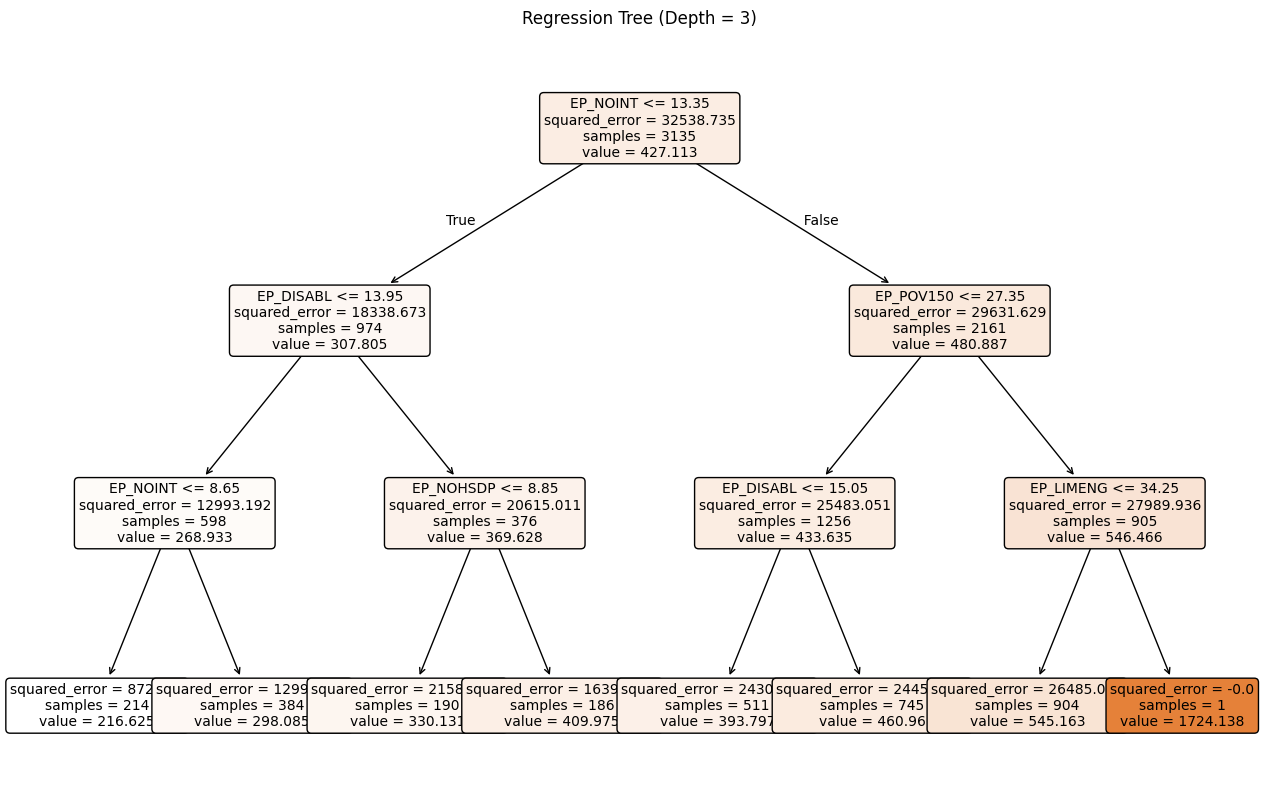

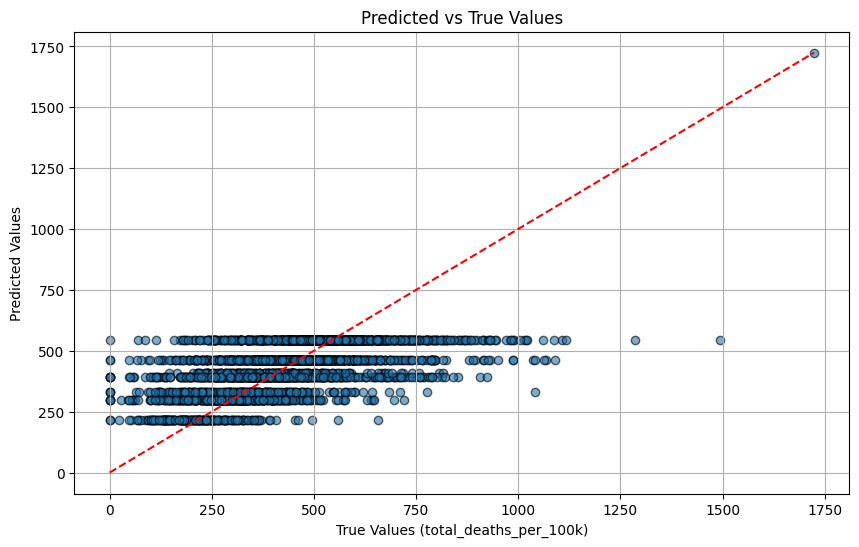

Overall Mean Squared Error of the final tree: 21879.42774585705


In [4]:
!pip install numpy pandas scikit-learn matplotlib
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/aaronpresser/Downloads/svi_covid.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Define predictor and outcome variables
outcome_var = "total_deaths_per_100k"
predictor_vars = [
    "EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR",
    "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG",
    "EP_MINRTY", "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH",
    "EP_GROUPQ", "EP_NOINT"
]

X = data[predictor_vars]
y = data[outcome_var]

# Question 1: Function to fit a regression tree
def fit_regression_tree(X, y, max_depth):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X, y)
    return tree

# Question 2: Function to predict using a fitted tree
def predict_tree(tree, X):
    return tree.predict(X)

# Question 3: Function to calculate mean squared error
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# Question 4: Perform 5-fold cross-validation for tree depths 1 to 10
kf = KFold(n_splits=5, shuffle=True, random_state=42)
max_depths = range(1, 11)
mean_mse_per_depth = []

for depth in max_depths:
    fold_mses = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        tree = fit_regression_tree(X_train, y_train, max_depth=depth)
        y_pred = predict_tree(tree, X_test)
        fold_mses.append(calculate_mse(y_test, y_pred))
    
    mean_mse_per_depth.append(np.mean(fold_mses))

# Plot mean squared error as a function of tree depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_mse_per_depth, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Tree Depth")
plt.grid(True)
plt.show()

# Select the best depth
best_depth = max_depths[np.argmin(mean_mse_per_depth)]
print(f"Best tree depth based on cross-validation: {best_depth}")

# The fact that the best depth here is 3 means that a simpler tree is better and avoids overfitting. Cross-validation results indicate that higher depths might overfit the training data, leading to higher test MSE.

# Question 5: Fit a regression tree to the full dataset with the chosen depth
final_tree = fit_regression_tree(X, y, max_depth=best_depth)

# Question 6: Plot the fitted tree
plt.figure(figsize=(16, 10))
plot_tree(final_tree, feature_names=predictor_vars, filled=True, rounded=True, fontsize=10)
plt.title(f"Regression Tree (Depth = {best_depth})")
plt.show()

# The most important predictors can be inferred from the splits in the plotted regression tree: Variables used at the top levels of the tree are the most influential. In the visualization, the splits indicate that the root split, first level splits, and second level splits most effectively divide the dataset into subsets with similar total_deaths_per_100k.

# Question 7: Predict using the fitted tree on the full dataset
y_pred = predict_tree(final_tree, X)

# Plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("True Values (total_deaths_per_100k)")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.grid(True)
plt.show()

# I wouldn't trust the predictions that much because the graph of the predicted versus true values is not very logical. The predicted values are a simple linear function and the actual values can vary widely. In addition, the MSE is fairly high, suggesting low quality performance.

# Question 8: Calculate overall MSE for the final tree
overall_mse = calculate_mse(y, y_pred)
print(f"Overall Mean Squared Error of the final tree: {overall_mse}")
